# SVD 개요

In [1]:
import numpy as np

np.random.seed(121)
a = np.random.randn(4,4)
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [5]:
# SVD 행렬 분해
U, Sigma, VT = np.linalg.svd(a)

print("U:\n{}".format(U))
print()
print("Sigma:\n{}".format(Sigma))
print()
print("VT:\n{}".format(VT))

U:
[[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]

Sigma:
[3.4229581  2.02287339 0.46263157 0.07935069]

VT:
[[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [6]:
# 특잇값 Sigma를 대각행렬로 변환
Sigma_mat = np.diag(Sigma)
Sigma_mat 

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [7]:
print('원본행렬 a:\n{}'.format(a))

원본행렬 a:
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [9]:
# U, Sigma_mat, VT를 이용해 다시 조합
a_= U @ Sigma_mat @ VT
print('조합된 행렬 a_: \n{}'.format(a_))

조합된 행렬 a_: 
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [18]:
# truncated Sigma_mat: 설명력이 높은 특잇값이 상위 2개면 될 것 같으니까 2개를사용.
# Sigma_truncated = Sigma_mat[:2,:2]
Sigma_truncated = np.diag(Sigma[:2])
Sigma_truncated

array([[3.4229581 , 0.        ],
       [0.        , 2.02287339]])

In [21]:
# trucated U: 잠재변수(Sigma=특잇값 2개)에 대응되는 기저벡터 얻어내기
U_truncated = U[:,:2]
U_truncated

array([[-0.07913928, -0.31822729],
       [ 0.38294523,  0.78655287],
       [ 0.65640669,  0.02243181],
       [ 0.64515128, -0.52873697]])

In [22]:
# trunctaed VT: 원래 데이터를 복구하기 위해서 2개의 벡터만 사용한다.
VT_truncated = VT[:2]
VT_truncated

array([[ 0.04100747,  0.22367823,  0.78643002, -0.57429458],
       [-0.20019867,  0.56209596,  0.37041464,  0.71187191]])

In [24]:
# 2개의 잠재변수만을 이용해서 복구
a_truncated = U_truncated @ Sigma_truncated @ VT_truncated
a_truncated

array([[ 0.11776606, -0.4224323 , -0.45148469, -0.3026849 ],
       [-0.26478267,  1.18754777,  1.62022235,  0.37986869],
       [ 0.08305338,  0.52807808,  1.78380053, -1.25805288],
       [ 0.30468393, -0.10724542,  1.34051007, -2.02962493]])

In [25]:
print('원본행렬 a:\n{}'.format(a))

원본행렬 a:
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [27]:
# 데이터가 선형 종속인 경우에는??
a[2] = a[0] + a[1]
a[3] = a[0]

a
#독립인 벡터가 2개. rank=2

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

In [31]:
U, Sigma, VT = np.linalg.svd(a)
np.round(Sigma,3)
# rank=2기 때문에 뒤에 0인 것들은 쓸모 없는것이라 판단.

array([2.663, 0.807, 0.   , 0.   ])

# 사이파이를 이용한 특이분해

In [32]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd # np.lianalg.svd와 같음

np.random.seed(121)

In [33]:
matrix = np.random.random((6,6))
print('원본행렬: \n{}'.format(matrix))

원본행렬: 
[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


In [39]:
U, Sigma, VT = svd(matrix, full_matrices = False)
# full_matrixs=false -> compact svd로 수행하겠다.
print(U.shape, Sigma.shape, VT.shape)

(6, 6) (6,) (6, 6)


In [40]:
np.round(Sigma, 3)

array([3.254, 0.881, 0.839, 0.555, 0.358, 0.035])

In [43]:
# svds: truncated svd를 손쉽게 수행

num_components = 4
U_truncated, Sigma_truncated, VT_truncated = svds(matrix,k=num_components)
U_truncated.shape, Sigma_truncated.shape, VT_truncated.shape

((6, 4), (4,), (4, 6))

# 사이킷런에서 Trunctaed SVD

In [46]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

In [48]:
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris.data)

iris_tsvd = tsvd.transform(iris.data)
iris_tsvd.shape


(150, 2)

In [50]:
import pandas as pd

iris_tsvd_df = pd.DataFrame(
        data = iris_tsvd,
        columns = ['component_1','component_2'])


iris_tsvd_df['target'] = iris.target
iris_tsvd_df.head()

,component_1,component_2,target
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


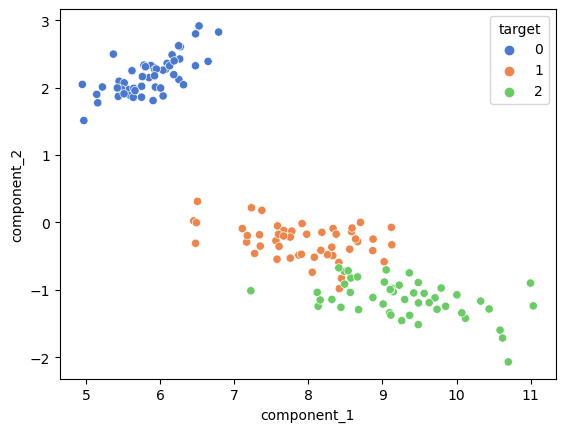

In [53]:
sns.scatterplot(
        x='component_1',
        y='component_2',
        hue='target',
        palette='muted',
        data = iris_tsvd_df)

plt.show()